In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('clean_data.csv')
df.head()

,Date_Object,Total_Power_Generation
0,2019-02-01,112.22261
1,2019-03-01,107.36345
2,2019-04-01,91.67904
3,2019-07-01,107.53155
4,2019-08-01,105.01283


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date_Object             57 non-null     object 
 1   Total_Power_Generation  57 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


In [5]:
df['Date_Object'] = pd.to_datetime(df['Date_Object'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date_Object             57 non-null     datetime64[ns]
 1   Total_Power_Generation  57 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 KB


In [6]:
df.head()

,Date_Object,Total_Power_Generation
0,2019-02-01,112.22261
1,2019-03-01,107.36345
2,2019-04-01,91.67904
3,2019-07-01,107.53155
4,2019-08-01,105.01283


In [7]:
df.set_index('Date_Object', inplace=True)
df.head()

,Total_Power_Generation
Date_Object,
2019-02-01,112.22261
2019-03-01,107.36345
2019-04-01,91.67904
2019-07-01,107.53155
2019-08-01,105.01283


<Axes: xlabel='Date_Object', ylabel='Total_Power_Generation'>

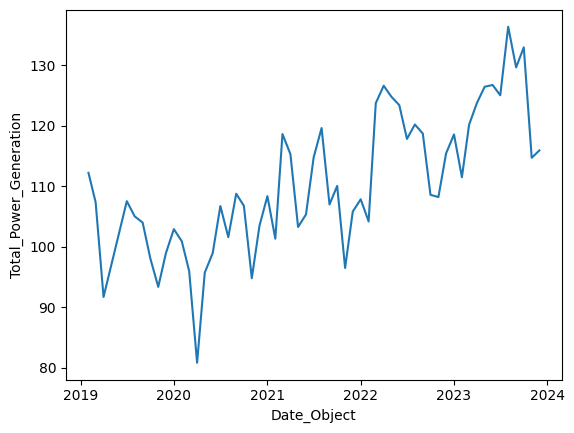

In [8]:
sns.lineplot(data=df,x=df.index,y=df.Total_Power_Generation)

Looking at the pattern, we a seasonal data pattern.
There are 4 types of pattern: 
1. Trend : Increasing or decreasing by time
2. Seasonal : Eg. Icecream sales increase during april, may months and decrease during rest of the year.
3. Cyclic : The trend continues for sometime and then it goes away. It has no fixed time, when it would come back. Eg. Covid cases spiked in 2019 and reduced in consequent years
4. Irregular : Very irregular data, avoided for analysis.

The above data is non stationery, coz the mean and variance changes.

------->We will start with rolling statistics

In [9]:
df['rollmean'] = df.Total_Power_Generation.rolling(window=12).mean()
df['rollstd'] = df.Total_Power_Generation.rolling(window=12).std()

<Axes: xlabel='Date_Object', ylabel='Total_Power_Generation'>

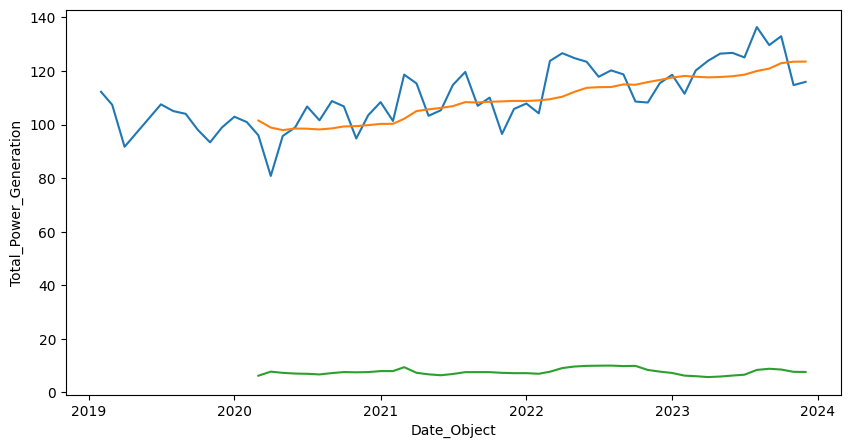

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.Total_Power_Generation)
sns.lineplot(data=df,x=df.index,y=df.rollmean)
sns.lineplot(data=df,x=df.index,y=df.rollstd)


In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
adfTest = adfuller(df['Total_Power_Generation'],autolag = 'AIC')
adfTest

(-2.833271123868754,
 0.05367613976602283,
 0,
 56,
 {'1%': -3.552928203580539,
  '5%': -2.9147306250000002,
  '10%': -2.595137155612245},
 315.80950929459436)

In [13]:
stats = pd.Series(adfTest[0:4], index = ['Test Statistic', 'p-value', '#lags used', 'number of observations used'])
stats

Test Statistic                 -2.833271
p-value                         0.053676
#lags used                      0.000000
number of observations used    56.000000
dtype: float64

In [14]:
for key, values in adfTest[4].items():
    print('criticality', key,': ',values)

criticality 1% :  -3.552928203580539
criticality 5% :  -2.9147306250000002
criticality 10% :  -2.595137155612245


Test Statistic < Criticality but here, one value is not

We have to make data stationery, so there are many ways: Time shift, log, Square Root, Cube....
We will start with time shift

1. In time shift, we shift the data by one column, in log, we find the the log of the data, in square root, we find square root of data.

In [15]:
def test_stationarity(dataFrame, var):
    dataFrame['rollmean'] = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollstd'] = dataFrame[var].rolling(window=12).std()

    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame['Total_Power_Generation'],autolag = 'AIC')
    stats = pd.Series(adfTest[0:4], index = ['Test Statistic', 'p-value', '#lags used', 'number of observations used'])
    print(stats)
    for key, values in adfTest[4].items():
        print('criticality', key,': ',values)
    
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollmean', label='Rolling Mean')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollstd', label='Rolling Std')
    plt.legend()

A function for testing any data for the statistic values.
Orange curve: mean curve
Green curve: standard deviation curve

Test Statistic                 -2.833271
p-value                         0.053676
#lags used                      0.000000
number of observations used    56.000000
dtype: float64
criticality 1% :  -3.552928203580539
criticality 5% :  -2.9147306250000002
criticality 10% :  -2.595137155612245


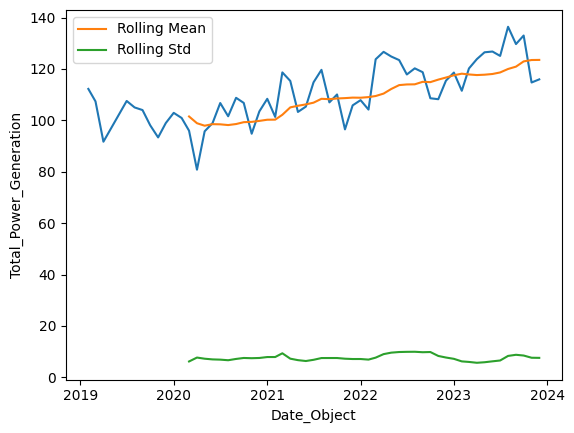

In [16]:
test_stationarity(df, 'Total_Power_Generation')

In [17]:
df.head()

,Total_Power_Generation,rollmean,rollstd
Date_Object,,,
2019-02-01,112.22261,NaN,NaN
2019-03-01,107.36345,NaN,NaN
2019-04-01,91.67904,NaN,NaN
2019-07-01,107.53155,NaN,NaN
2019-08-01,105.01283,NaN,NaN


In [18]:
air_df = df[['Total_Power_Generation']]
air_df.head()

,Total_Power_Generation
Date_Object,
2019-02-01,112.22261
2019-03-01,107.36345
2019-04-01,91.67904
2019-07-01,107.53155
2019-08-01,105.01283


Starting with time shift

In [19]:
air_df['shift'] = air_df.Total_Power_Generation.shift()     #to shift by one month, keep empty, to shift by more months, add value
air_df['shiftDiff'] = air_df['Total_Power_Generation'] - air_df['shift'] 
air_df.head()

C:\Users\adity\AppData\Local\Temp\ipykernel_11404\1865876682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shift'] = air_df.Total_Power_Generation.shift()     #to shift by one month, keep empty, to shift by more months, add value


,Total_Power_Generation,shift,shiftDiff
Date_Object,,,
2019-02-01,112.22261,NaN,NaN
2019-03-01,107.36345,112.22261,-4.85916
2019-04-01,91.67904,107.36345,-15.68441
2019-07-01,107.53155,91.67904,15.85251
2019-08-01,105.01283,107.53155,-2.51872


We will check stationarity of the data.

Test Statistic                 -2.803266
p-value                         0.057809
#lags used                      0.000000
number of observations used    55.000000
dtype: float64
criticality 1% :  -3.5552728880540942
criticality 5% :  -2.9157312396694217
criticality 10% :  -2.5956695041322315


C:\Users\adity\AppData\Local\Temp\ipykernel_11404\1533525417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollmean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\adity\AppData\Local\Temp\ipykernel_11404\1533525417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollstd'] = dataFrame[var].rolling(window=12).std()


Text(0, 0.5, 'Time Shifted Transformation')

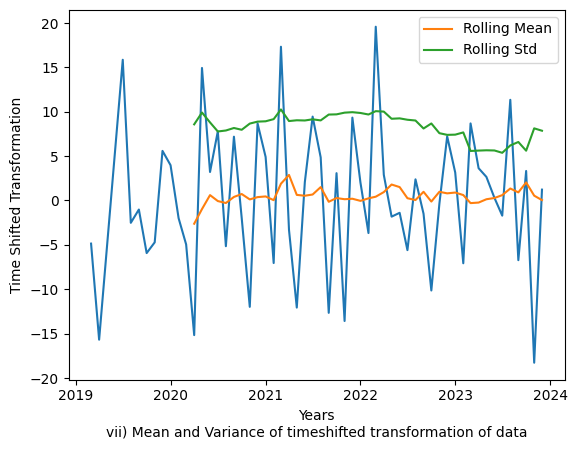

In [20]:
test_stationarity(air_df.dropna(),'shiftDiff')
plt.xlabel('Years\nvii) Mean and Variance of timeshifted transformation of data')
plt.ylabel('Time Shifted Transformation')

The data is much stationery right now compared to earlier.

In [21]:
log_df = df[['Total_Power_Generation']]
log_df['log'] = np.log(log_df['Total_Power_Generation'])
log_df.head()

C:\Users\adity\AppData\Local\Temp\ipykernel_11404\854222627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['log'] = np.log(log_df['Total_Power_Generation'])


,Total_Power_Generation,log
Date_Object,,
2019-02-01,112.22261,4.720484
2019-03-01,107.36345,4.676220
2019-04-01,91.67904,4.518294
2019-07-01,107.53155,4.677784
2019-08-01,105.01283,4.654083


Test Statistic                 -2.833271
p-value                         0.053676
#lags used                      0.000000
number of observations used    56.000000
dtype: float64
criticality 1% :  -3.552928203580539
criticality 5% :  -2.9147306250000002
criticality 10% :  -2.595137155612245


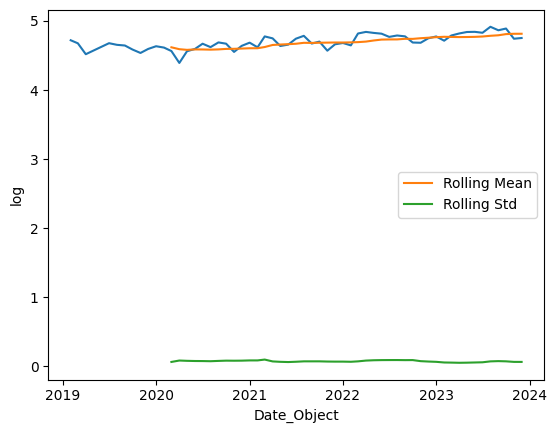

In [22]:
test_stationarity(log_df,'log')

In [23]:
sqrt_df = df[['Total_Power_Generation']]
sqrt_df['sqrt'] = np.sqrt(df['Total_Power_Generation'])
sqrt_df.head()

C:\Users\adity\AppData\Local\Temp\ipykernel_11404\4031663183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df['sqrt'] = np.sqrt(df['Total_Power_Generation'])


,Total_Power_Generation,sqrt
Date_Object,,
2019-02-01,112.22261,10.593517
2019-03-01,107.36345,10.361634
2019-04-01,91.67904,9.574917
2019-07-01,107.53155,10.369742
2019-08-01,105.01283,10.247577


Test Statistic                 -2.833271
p-value                         0.053676
#lags used                      0.000000
number of observations used    56.000000
dtype: float64
criticality 1% :  -3.552928203580539
criticality 5% :  -2.9147306250000002
criticality 10% :  -2.595137155612245


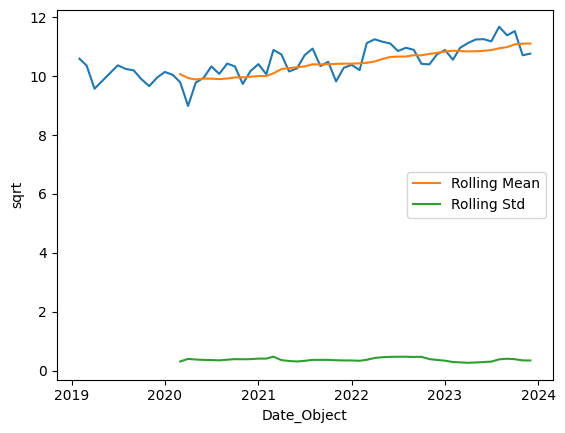

In [24]:
test_stationarity(sqrt_df,'sqrt')

STATIONARITY WITH CUBE ROOT

In [25]:
cbrt_df = df[['Total_Power_Generation']]
cbrt_df['cbrt'] = np.cbrt(cbrt_df['Total_Power_Generation'])
cbrt_df.head()

C:\Users\adity\AppData\Local\Temp\ipykernel_11404\3173789068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbrt_df['cbrt'] = np.cbrt(cbrt_df['Total_Power_Generation'])


,Total_Power_Generation,cbrt
Date_Object,,
2019-02-01,112.22261,4.823476
2019-03-01,107.36345,4.752829
2019-04-01,91.67904,4.509102
2019-07-01,107.53155,4.755308
2019-08-01,105.01283,4.717886


Test Statistic                 -2.833271
p-value                         0.053676
#lags used                      0.000000
number of observations used    56.000000
dtype: float64
criticality 1% :  -3.552928203580539
criticality 5% :  -2.9147306250000002
criticality 10% :  -2.595137155612245


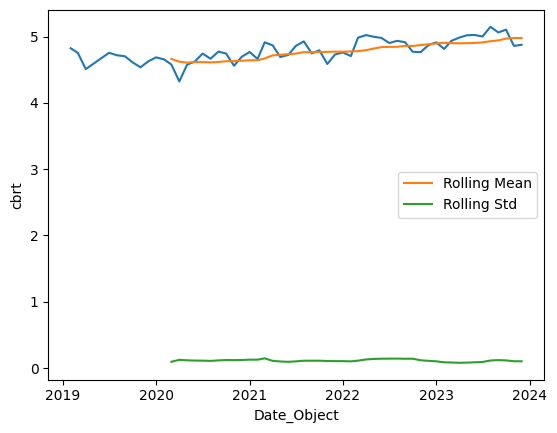

In [26]:
test_stationarity(cbrt_df,'cbrt')

We got better results in log, sqrt, and cbrt, compared to time shifting. We can combine log and sqrt for a mix variant model.

In [27]:
log_df2 = log_df[['Total_Power_Generation','log']]
log_df2['log_sqrt'] = np.sqrt(log_df['log'])
log_df2['log_shiftdiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift()
log_df2.head()

C:\Users\adity\AppData\Local\Temp\ipykernel_11404\457026870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df['log'])


,Total_Power_Generation,log,log_sqrt,log_shiftdiff
Date_Object,,,,
2019-02-01,112.22261,4.720484,2.172668,NaN
2019-03-01,107.36345,4.676220,2.162457,-0.010211
2019-04-01,91.67904,4.518294,2.125628,-0.036829
2019-07-01,107.53155,4.677784,2.162819,0.037191
2019-08-01,105.01283,4.654083,2.157332,-0.005486


We will find difference of log and log_sqrt and time shifting and perform test stationarity

C:\Users\adity\AppData\Local\Temp\ipykernel_11404\1533525417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollmean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\adity\AppData\Local\Temp\ipykernel_11404\1533525417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollstd'] = dataFrame[var].rolling(window=12).std()


Test Statistic                 -2.803266
p-value                         0.057809
#lags used                      0.000000
number of observations used    55.000000
dtype: float64
criticality 1% :  -3.5552728880540942
criticality 5% :  -2.9157312396694217
criticality 10% :  -2.5956695041322315


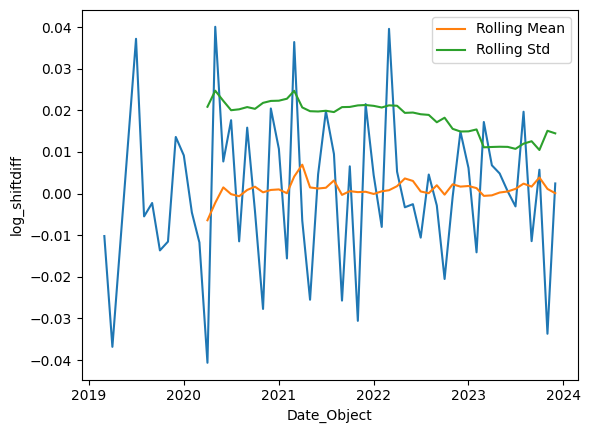

In [28]:
test_stationarity(log_df2.dropna(),'log_shiftdiff')

This curve is very much acceptable.

We will build ARIMA model with original data first, as building with the stationery data is somewhat complex.

In [29]:
airP = df[['Total_Power_Generation']].copy(deep=True)       #we wont modify original data.

In [30]:
airP.head()

,Total_Power_Generation
Date_Object,
2019-02-01,112.22261
2019-03-01,107.36345
2019-04-01,91.67904
2019-07-01,107.53155
2019-08-01,105.01283


Seasonlity is on 12 months, so we will shift by 12 months.

In [31]:
airP['FirstDiff'] = airP['Total_Power_Generation'].diff()
airP['Diff12'] = airP['Total_Power_Generation'].diff(12)

In [32]:
airP.head()

,Total_Power_Generation,FirstDiff,Diff12
Date_Object,,,
2019-02-01,112.22261,NaN,NaN
2019-03-01,107.36345,-4.85916,NaN
2019-04-01,91.67904,-15.68441,NaN
2019-07-01,107.53155,15.85251,NaN
2019-08-01,105.01283,-2.51872,NaN


In [33]:
#importing ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

AR - AutoRegressive : p

I - Integration : d

MA - Moving Averages : q

We have to supply p,d,q

1. d is the number of shiftings we are done, eg 1 month shift, d = 1, or 12 months shift, d = 12

<Figure size 3600x2400 with 0 Axes>

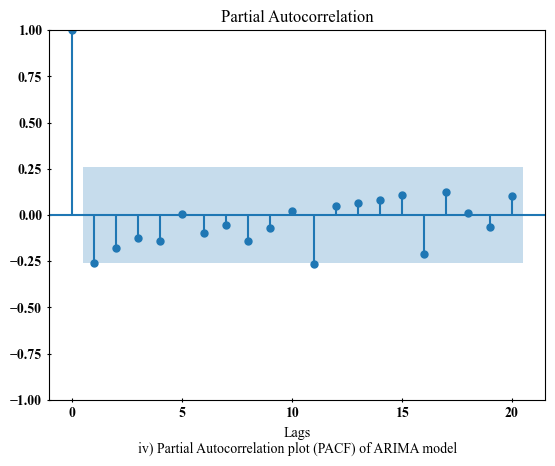

<Figure size 3600x2400 with 0 Axes>

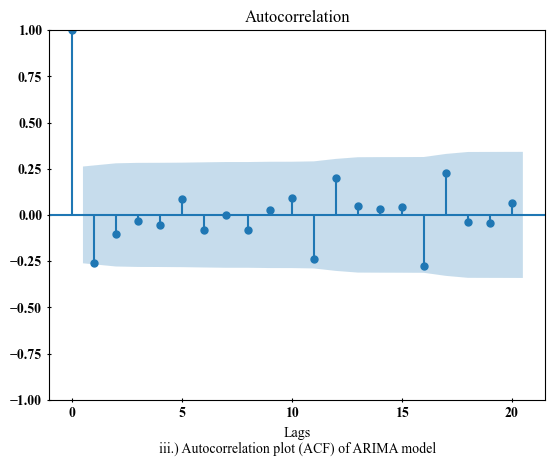

In [34]:
# Set the font to Times New Roman and make it bold
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'

# Create the plot for PACF
plt.figure(figsize=(6, 4), dpi=600)  # Set the figure size and DPI
plot_pacf(airP['FirstDiff'].dropna(), lags=20)  # Plot PACF
plt.xlabel('Lags\niv) Partial Autocorrelation plot (PACF) of ARIMA model', fontsize=10)  # Set x-axis label
plt.xticks(fontsize=10)  # Set x-axis tick font size
plt.yticks(fontsize=10)  # Set y-axis tick font size
plt.tick_params(axis='x', direction='inout')  # Set tick direction for x-axis
plt.tick_params(axis='y', direction='inout')  # Set tick direction for y-axis
plt.savefig('pacf_plot_arima.jpeg', bbox_inches='tight', pad_inches=0.1, dpi=600, transparent=True)  # Save the plot as SVG
plt.show()  # Show the plot

# Create the plot for ACF
plt.figure(figsize=(6, 4), dpi=600)  # Set the figure size and DPI
plot_acf(airP['FirstDiff'].dropna(), lags=20)  # Plot ACF
plt.xlabel('Lags\niii.) Autocorrelation plot (ACF) of ARIMA model', fontsize=10)  # Set x-axis label
plt.xticks(fontsize=10)  # Set x-axis tick font size
plt.yticks(fontsize=10)  # Set y-axis tick font size
plt.tick_params(axis='x', direction='inout')  # Set tick direction for x-axis
plt.tick_params(axis='y', direction='inout')  # Set tick direction for y-axis
plt.savefig('acf_plot_arima.jpeg', bbox_inches='tight', pad_inches=0.1, dpi=600, transparent=True)  # Save the plot as SVG
plt.show()  # Show the plot


In [35]:
from pmdarima.arima import auto_arima

In [36]:
stepwise_fit = auto_arima(airP['FirstDiff'].dropna(), trace = True, suppress_warnings=True)
stepwise_fit.summary()
#this gives different combinations of p, q, and q. depending on least AIC value

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=400.017, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=398.107, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=395.523, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=398.021, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=393.646, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=392.204, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=396.115, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=394.188, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=394.188, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=392.636, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=395.837, Time=0.06 se

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -193.102
Date:                Thu, 20 Jun 2024   AIC                            392.204
Time:                        21:27:40   BIC                            398.280
Sample:                             0   HQIC                           394.560
                                 - 56                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4223      0.252      1.679      0.093      -0.071       0.915
ma.L1         -0.8333      0.144     -5.800      0.000      -1.115      -0.552
sigma2        57.3651     10.931      5.248      0.000      35.941      78.789
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.97   Prob(JB):                         0.71
Heteroskedasticity (H):               0.70   Skew:                            -0.27
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Shaded area is insignificant area and outside that is significant area.

In [37]:
#p = 1, q = 1, d = 0

We will make training data now.70% training data 30% testing data

In [38]:
round(len(airP)*70/100)

40

In [39]:
train = airP[:round(len(airP)*70/100)]
train.tail()

,Total_Power_Generation,FirstDiff,Diff12
Date_Object,,,
2022-03-01,123.75158,19.57527,5.11041
2022-04-01,126.64498,2.89340,11.31828
2022-05-01,124.82180,-1.82318,21.56285
2022-06-01,123.43167,-1.39013,18.09347
2022-07-01,117.83792,-5.59375,3.05276


In [40]:
test = airP[round(len(airP)*70/100):]
test.tail()

,Total_Power_Generation,FirstDiff,Diff12
Date_Object,,,
2023-08-01,136.39555,11.34113,16.17467
2023-09-01,129.66907,-6.72648,10.94405
2023-10-01,132.99263,3.32356,24.40912
2023-11-01,114.71275,-18.27988,6.49983
2023-12-01,115.93517,1.22242,0.50058


70% TRAINING AND 30% TESTING DATA

In [41]:
print(len(train))
print(len(test))

40
17


FirstDiff and Diff12 are only used to analyse the mean and variance only.

In [42]:
import statsmodels.api


In [43]:
print(train.shape[0]+test.shape[0]-1)

56


In [44]:
print(len(df) - 17)

40


In [45]:
model = statsmodels.tsa.arima.model.ARIMA(train['Total_Power_Generation'],order=(1,1,1))
model_fit = model.fit()
prediction = model_fit.predict(start=test.shape[0], end=(train.shape[0]+test.shape[0]-1),dynamic=False)
#prediction = model_fit.predict(start=len(df)-17, end= len(df),dynamic=False)

c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is ava

In [46]:
prediction

17    100.293285
18    104.492873
19    104.215974
20     98.112635
21    102.249513
22    105.180930
23    101.915075
24    111.328832
25    110.908751
26    105.118286
27    105.905257
28    110.992990
29    114.392132
30    108.435220
31    109.848503
32    102.418379
33    106.413756
34    107.416784
35    105.480539
36    115.998126
37    119.077447
38    119.526627
39    119.777995
40    117.402089
41    117.245978
42    117.190060
43    117.170030
44    117.162856
45    117.160286
46    117.159366
47    117.159036
48    117.158918
49    117.158875
50    117.158860
51    117.158855
52    117.158853
53    117.158852
54    117.158852
55    117.158852
56    117.158852
Name: predicted_mean, dtype: float64

In [47]:
assert len(prediction) == 40
airP['arimaPred'] = float('NaN')
airP.iloc[17:57, airP.columns.get_loc('arimaPred')] = prediction

In [48]:
airP

,Total_Power_Generation,FirstDiff,Diff12,arimaPred
Date_Object,,,,
2019-02-01,112.22261,NaN,NaN,NaN
2019-03-01,107.36345,-4.85916,NaN,NaN
2019-04-01,91.67904,-15.68441,NaN,NaN
2019-07-01,107.53155,15.85251,NaN,NaN
2019-08-01,105.01283,-2.51872,NaN,NaN
2019-09-01,103.99120,-1.02163,NaN,NaN
2019-10-01,98.06368,-5.92752,NaN,NaN
2019-11-01,93.34629,-4.71739,NaN,NaN
2019-12-01,98.93263,5.58634,NaN,NaN


In [49]:
train

,Total_Power_Generation,FirstDiff,Diff12
Date_Object,,,
2019-02-01,112.22261,NaN,NaN
2019-03-01,107.36345,-4.85916,NaN
2019-04-01,91.67904,-15.68441,NaN
2019-07-01,107.53155,15.85251,NaN
2019-08-01,105.01283,-2.51872,NaN
2019-09-01,103.99120,-1.02163,NaN
2019-10-01,98.06368,-5.92752,NaN
2019-11-01,93.34629,-4.71739,NaN
2019-12-01,98.93263,5.58634,NaN


In [50]:
train['arimaPred'] = airP['arimaPred'].copy()
test['arimaPred'] = airP['arimaPred'].copy()


C:\Users\adity\AppData\Local\Temp\ipykernel_11404\3906530292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['arimaPred'] = airP['arimaPred'].copy()
C:\Users\adity\AppData\Local\Temp\ipykernel_11404\3906530292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred'] = airP['arimaPred'].copy()


<Axes: xlabel='Date_Object', ylabel='Total_Power_Generation'>

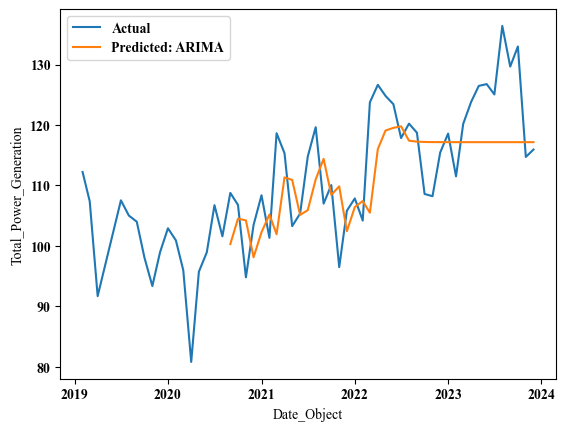

In [51]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='Total_Power_Generation', label = 'Actual')
sns.lineplot(data=airP,x=airP.index,y='arimaPred', label = 'Predicted: ARIMA')

There is somewhat error here, we will look in Seasonal ARIMA model

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

In [53]:
airP.head()

,Total_Power_Generation,FirstDiff,Diff12,arimaPred
Date_Object,,,,
2019-02-01,112.22261,NaN,NaN,NaN
2019-03-01,107.36345,-4.85916,NaN,NaN
2019-04-01,91.67904,-15.68441,NaN,NaN
2019-07-01,107.53155,15.85251,NaN,NaN
2019-08-01,105.01283,-2.51872,NaN,NaN


We are gonna use the Diff12 values

<Figure size 3600x2400 with 0 Axes>

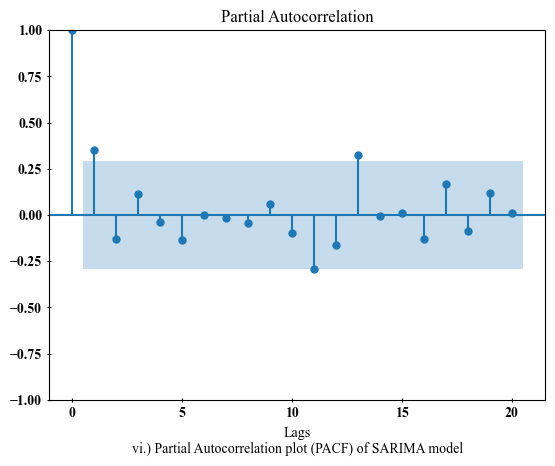

<Figure size 3600x2400 with 0 Axes>

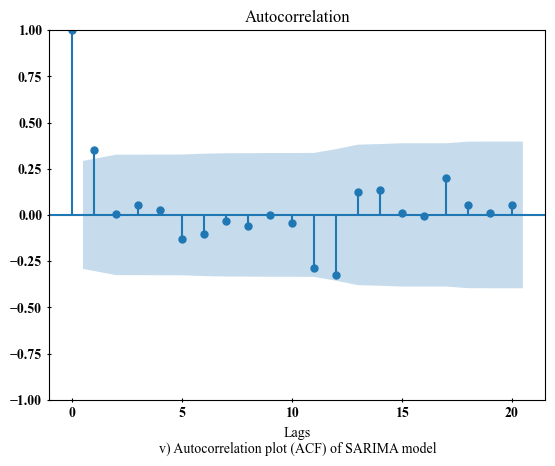

In [54]:
# Set the font to Times New Roman and make it bold
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'

# Create the plot for PACF
plt.figure(figsize=(6, 4), dpi=600)  # Set the figure size and DPI
plot_pacf(airP['Diff12'].dropna(), lags=20)  # Plot PACF
plt.xlabel('Lags\nvi.) Partial Autocorrelation plot (PACF) of SARIMA model', fontsize=10)  # Set x-axis label
plt.xticks(fontsize=10)  # Set x-axis tick font size
plt.yticks(fontsize=10)  # Set y-axis tick font size
plt.tick_params(axis='x', direction='inout')  # Set tick direction for x-axis
plt.tick_params(axis='y', direction='inout')  # Set tick direction for y-axis
plt.savefig('pacf_plot_sarimax.jpeg', bbox_inches='tight', pad_inches=0.1, dpi=600, transparent=True)  # Save the plot as SVG
plt.show()  # Show the plot

# Create the plot for ACF
plt.figure(figsize=(6, 4), dpi=600)  # Set the figure size and DPI
plot_acf(airP['Diff12'].dropna(), lags=20)  # Plot ACF
plt.xlabel('Lags\nv) Autocorrelation plot (ACF) of SARIMA model', fontsize=10)  # Set x-axis label
plt.xticks(fontsize=10)  # Set x-axis tick font size
plt.yticks(fontsize=10)  # Set y-axis tick font size
plt.tick_params(axis='x', direction='inout')  # Set tick direction for x-axis
plt.tick_params(axis='y', direction='inout')  # Set tick direction for y-axis
plt.savefig('acf_plot_Sarimax.jpeg', bbox_inches='tight', pad_inches=0.1, dpi=600, transparent=True)  # Save the plot as SVG
plt.show()  # Show the plot


In [55]:
import pmdarima as pm

In [56]:
airP_noNan = airP.dropna()
results = pm.auto_arima(airP_noNan.Diff12, d = 0, start_p = 0, start_q = 0, max_p = 4, max_q = 4, seasonal = True, m = 12, D = 1, start_P = 1, start_Q = 1, max_P = 4, max_Q = 4, information_criterion = 'aic', trace = True, stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=222.467, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=223.455, Time=0.19 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=220.868, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=223.069, Time=0.11 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=222.797, Time=0.19 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=223.786, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=223.624, Time=0.08 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=225.571, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 1.969 seconds


In [57]:
model = sm.tsa.statespace.SARIMAX(train['Total_Power_Generation'],order=(1,1,1),seasonal_order=(2,1,2,12))
model_fit = model.fit()
prediction1 = model_fit.predict(start=test.shape[0], end=(train.shape[0]+test.shape[0]-1),dynamic=False)
prediction1

c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836

17     97.103581
18     96.952674
19     95.561715
20     97.663811
21    104.438733
22    104.553244
23     99.094786
24    101.862384
25    113.282990
26     97.082804
27    114.018564
28    109.072817
29    117.709725
30    104.777848
31    100.509274
32    104.846348
33    110.812499
34    105.433689
35    113.345592
36    114.153603
37    119.300777
38    115.066019
39    128.876203
40    118.239467
41    116.726166
42    115.166613
43    105.714993
44    113.541504
45    117.328562
46    113.518418
47    123.276369
48    118.045807
49    119.101106
50    118.657494
51    124.178205
52    123.467717
53    122.139102
54    121.166234
55    110.261507
56    118.548032
Name: predicted_mean, dtype: float64

In [58]:
assert len(prediction1) == 40
airP['sarimaPred'] = float('NaN')
airP.iloc[17:57, airP.columns.get_loc('sarimaPred')] = prediction1

In [59]:
airP

,Total_Power_Generation,FirstDiff,Diff12,arimaPred,sarimaPred
Date_Object,,,,,
2019-02-01,112.22261,NaN,NaN,NaN,NaN
2019-03-01,107.36345,-4.85916,NaN,NaN,NaN
2019-04-01,91.67904,-15.68441,NaN,NaN,NaN
2019-07-01,107.53155,15.85251,NaN,NaN,NaN
2019-08-01,105.01283,-2.51872,NaN,NaN,NaN
2019-09-01,103.99120,-1.02163,NaN,NaN,NaN
2019-10-01,98.06368,-5.92752,NaN,NaN,NaN
2019-11-01,93.34629,-4.71739,NaN,NaN,NaN
2019-12-01,98.93263,5.58634,NaN,NaN,NaN


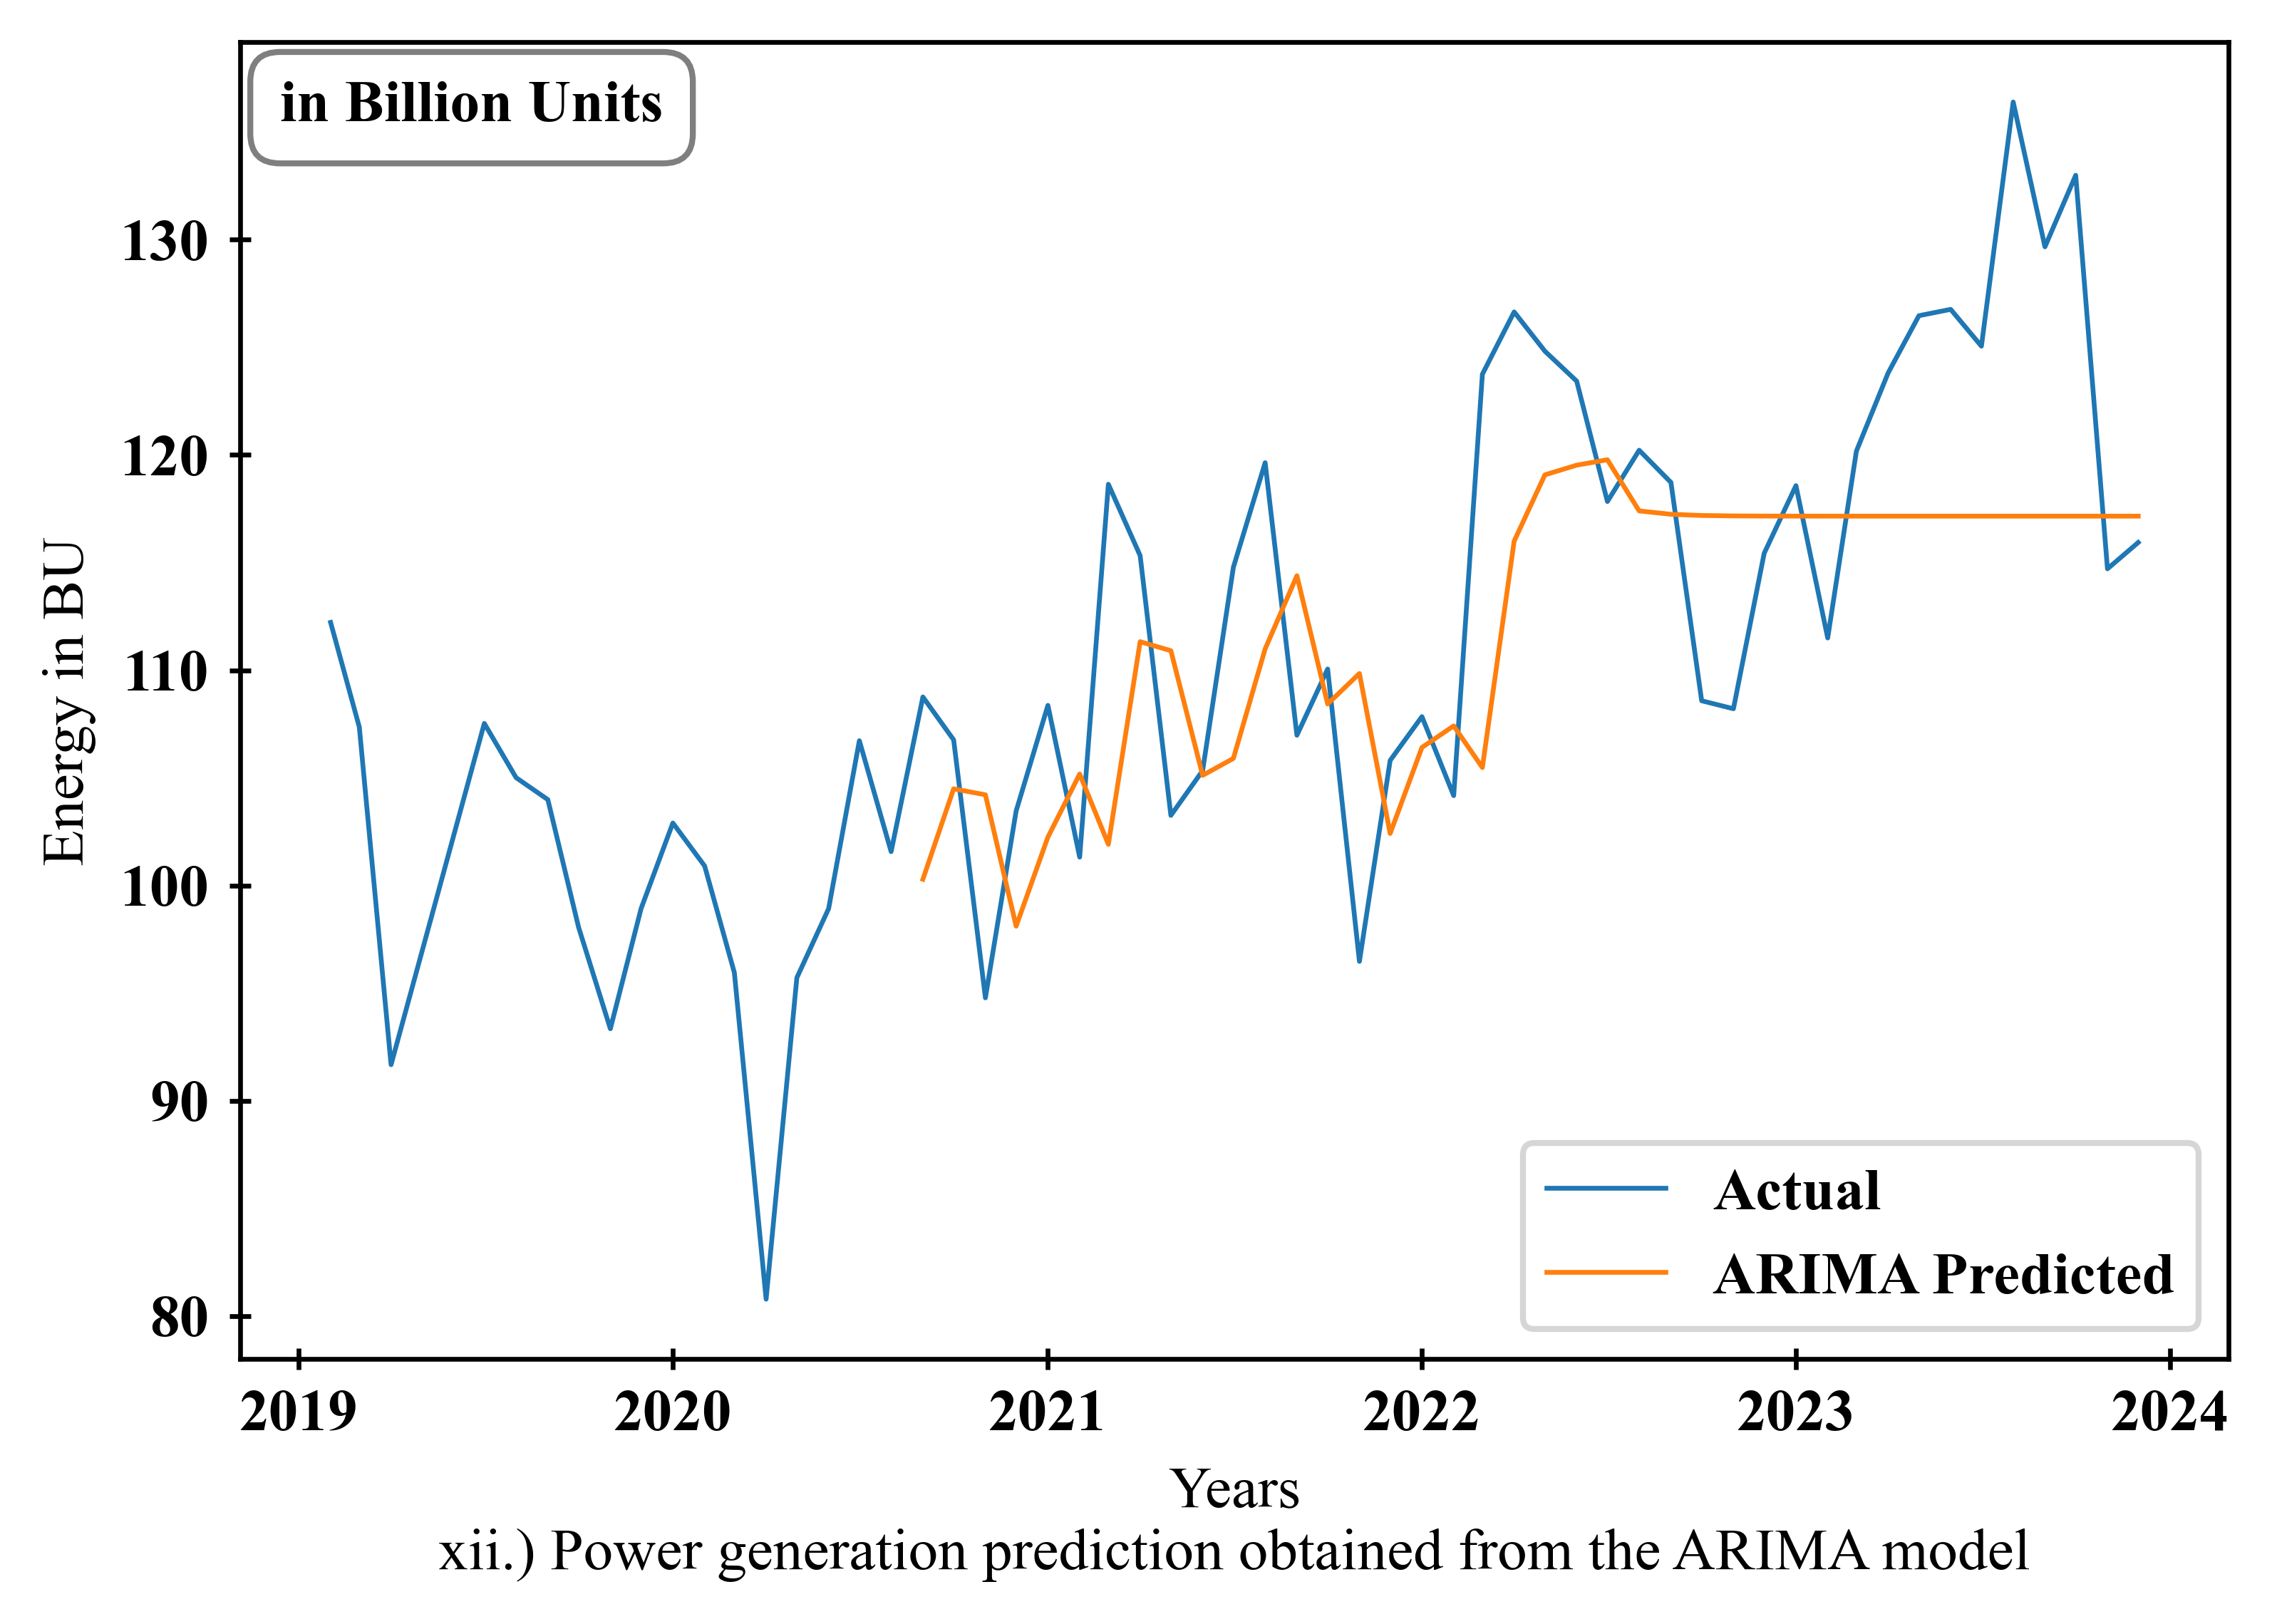

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font to Times New Roman and make it bold
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'

# Create the plot
plt.figure(figsize=(6, 4), dpi=600)  # Set the figure size and DPI
sns.lineplot(data=airP, x=airP.index, y='Total_Power_Generation', linewidth=0.8, label='Actual')  # Plot Total_Power_Generation with label
sns.lineplot(data=airP, x=airP.index, y='arimaPred', linewidth=0.8, label='ARIMA Predicted')  # Plot arimaPred with label

# Set the font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set tick direction
plt.tick_params(axis='x', direction='inout')
plt.tick_params(axis='y', direction='inout')

# Add text to the plot in a box at the top left corner
plt.text(0.02, 0.97, 'in Billion Units', horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))

plt.xlabel("Years\nxii.) Power generation prediction obtained from the ARIMA model")
plt.ylabel("Energy in BU")
# Add legend and move it to the upper left corner inside the plot
plt.legend(loc='lower right')

# Save the plot as a PDF with embedded fonts
plt.savefig('arima.png', bbox_inches='tight', pad_inches=0.1, dpi=600, transparent=True)

# Show the plot
plt.show()


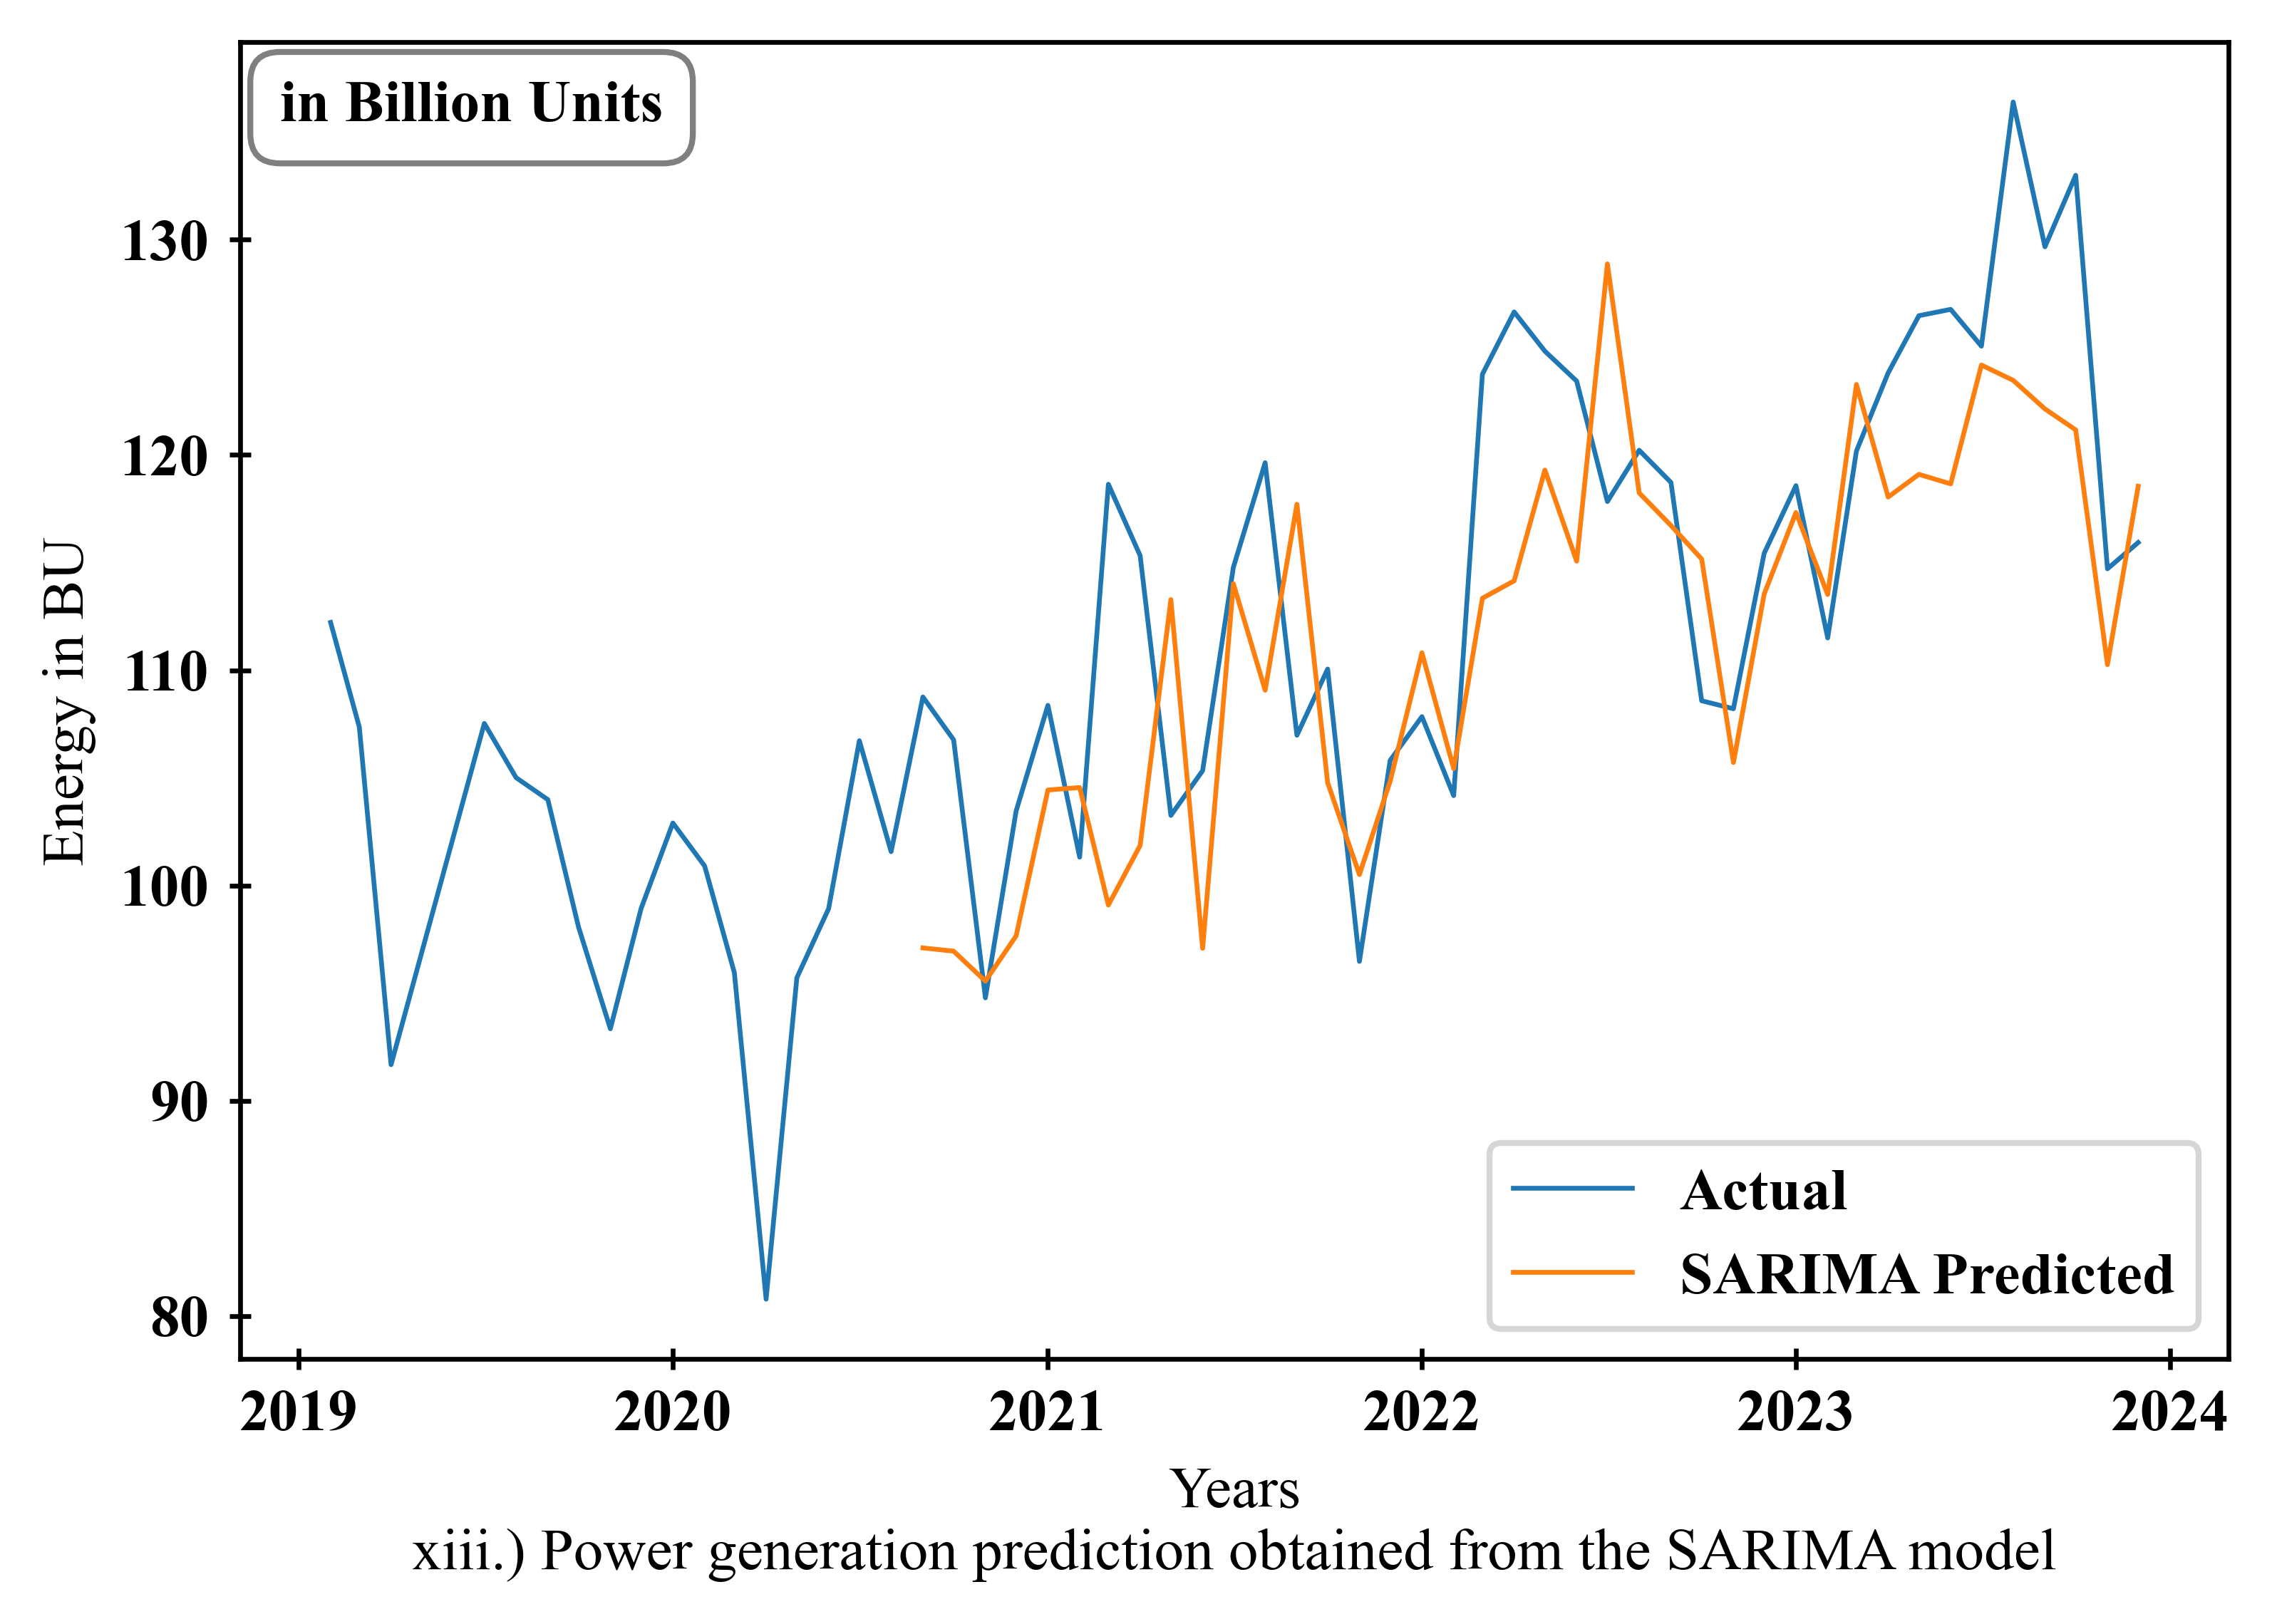

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font to Times New Roman and make it bold
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'

# Create the plot
plt.figure(figsize=(6, 4), dpi=600)  # Set the figure size and DPI
sns.lineplot(data=airP, x=airP.index, y='Total_Power_Generation', linewidth=0.8, label='Actual')  # Plot Total_Power_Generation with label
sns.lineplot(data=airP, x=airP.index, y='sarimaPred', linewidth=0.8, label='SARIMA Predicted')  # Plot arimaPred with label

# Set the font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set tick direction
plt.tick_params(axis='x', direction='inout')
plt.tick_params(axis='y', direction='inout')

# Add text to the plot in a box at the top left corner
plt.text(0.02, 0.97, 'in Billion Units', horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel("Years\nxiii.) Power generation prediction obtained from the SARIMA model")
plt.ylabel("Energy in BU")
# Add legend and move it to the upper left corner inside the plot
plt.legend(loc='lower right')

# Save the plot as a PDF with embedded fonts
plt.savefig('sarima.png', bbox_inches='tight', pad_inches=0.1, dpi=600, transparent=True)

# Show the plot
plt.show()


FUTURE PREDICTION

In [62]:
airP.tail()

,Total_Power_Generation,FirstDiff,Diff12,arimaPred,sarimaPred
Date_Object,,,,,
2023-08-01,136.39555,11.34113,16.17467,117.158853,123.467717
2023-09-01,129.66907,-6.72648,10.94405,117.158852,122.139102
2023-10-01,132.99263,3.32356,24.40912,117.158852,121.166234
2023-11-01,114.71275,-18.27988,6.49983,117.158852,110.261507
2023-12-01,115.93517,1.22242,0.50058,117.158852,118.548032


We will generate dates for future

In [63]:
future_Date = pd.DataFrame(pd.date_range(start='2024-01-01', end='2030-12-01',freq='MS'),columns=['Dates'])
future_Date.set_index('Dates',inplace=True)
future_Date.head()

""
Dates
2024-01-01
2024-02-01
2024-03-01
2024-04-01
2024-05-01


In [64]:
forecast = model_fit.predict(start=future_Date.shape[0],end=(future_Date.shape[0]+future_Date.shape[0]-1),dynamic=False)

c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [65]:
len(future_Date)

84

In [66]:
assert len(forecast) == 84
future_Date['Forecast'] = float('NaN')
future_Date.iloc[0:84, future_Date.columns.get_loc('Forecast')] = forecast

In [67]:
future_Date.head()
print(future_Date.index)

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01',
               '2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01',
               '2025-09-01', '2025-10-01', '2025-11-01', '2025-12-01',
               '2026-01-01', '2026-02-01', '2026-03-01', '2026-04-01',
               '2026-05-01', '2026-06-01', '2026-07-01', '2026-08-01',
               '2026-09-01', '2026-10-01', '2026-11-01', '2026-12-01',
               '2027-01-01', '2027-02-01', '2027-03-01', '2027-04-01',
               '2027-05-01', '2027-06-01', '2027-07-01', '2027-08-01',
               '2027-09-01', '2027-10-01', '2027-11-01', '2027-12-01',
               '2028-01-01', '2028-02-01', '2028-03-01', '2028-04-01',
               '2028-05-01', '2028-06-01', '2028-07-01', '2028-08-01',
      

<Axes: xlabel='Dates', ylabel='Forecast'>

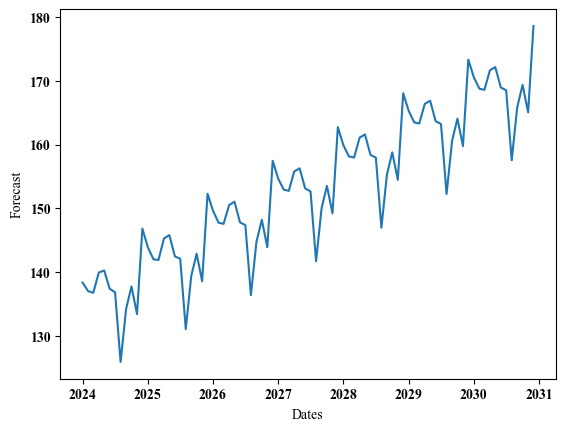

In [68]:
sns.lineplot(data=future_Date,x=future_Date.index,y='Forecast')

The graph is somewhat discontinous, so we make it continous

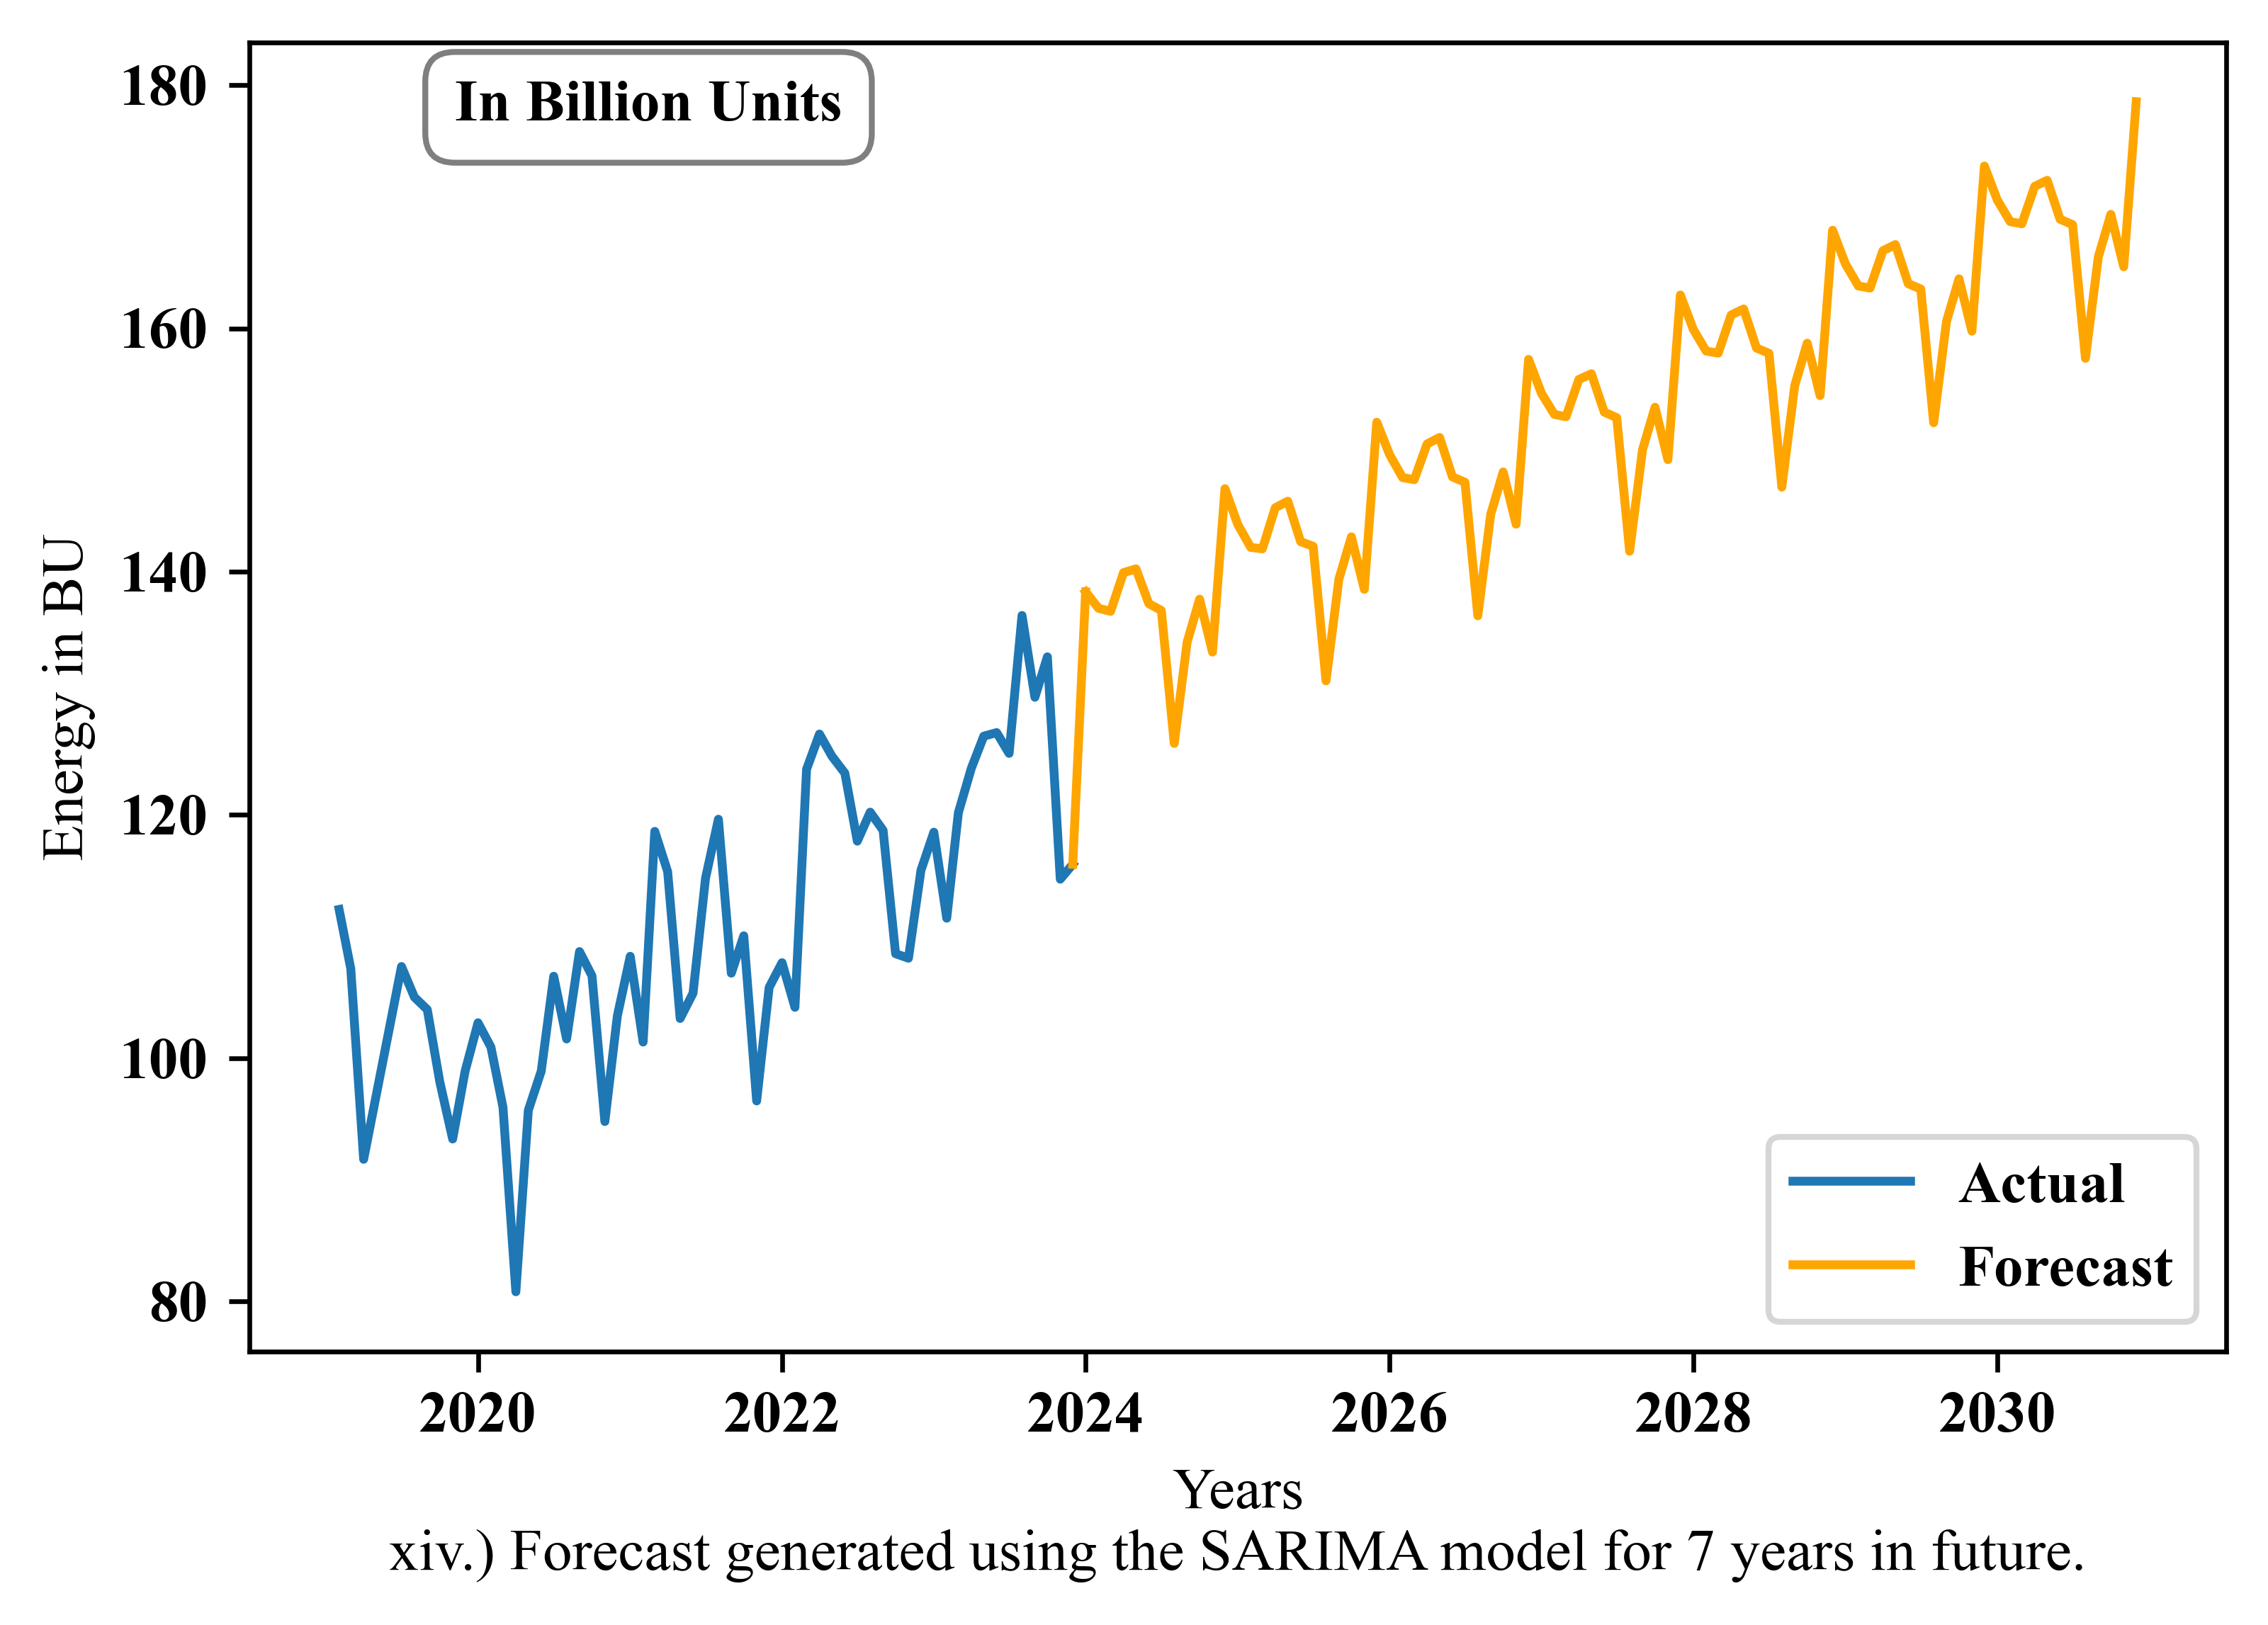

In [72]:
# Set the font to Times New Roman and make it bold
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'

# Get the last total power generation value and the first forecast value
last_total_power_generation = airP['Total_Power_Generation'].iloc[-1]
first_forecast = future_Date['Forecast'].iloc[0]

# Create the plot
plt.figure(figsize=(6, 4), dpi=600)  # Set the figure size and DPI
sns.lineplot(data=airP, x=airP.index, y='Total_Power_Generation', label='Actual')  # Plot Total_Power_Generation with label
sns.lineplot(data=future_Date, x=future_Date.index, y='Forecast', label='Forecast', color = 'orange')  # Plot Forecast with label
plt.plot([airP.index[-1], future_Date.index[0]], [last_total_power_generation, first_forecast], color='orange')  # Plot the connecting line
plt.grid()  # Enable grid lines
plt.legend(loc='lower right')  # Add legend in the bottom right corner
plt.xlabel("Years\nxiv.) Forecast generated using the SARIMA model for 7 years in future.")
plt.ylabel("Energy in BU")
# Add text to the plot in a box at the top right corner
plt.text(0.3, 0.97, 'In Billion Units', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round,pad=0.5'))
plt.grid()  # Add grid lines
plt.savefig('forecast_plot.png', bbox_inches='tight', pad_inches=0.1, dpi=600, transparent=True)  # Save the plot as SVG
plt.show()  # Show the plot


In [70]:
from sklearn import metrics
airP_clean = airP.dropna()
print(metrics.mean_absolute_error(airP_clean['Total_Power_Generation'],airP_clean['sarimaPred']))
print(metrics.mean_squared_error(airP_clean['Total_Power_Generation'],airP_clean['sarimaPred']))
print(np.sqrt(metrics.mean_squared_error(airP_clean['Total_Power_Generation'],airP_clean['sarimaPred'])))

6.341949362618746
60.36289527289243
7.769356168492498


In [71]:
from sklearn import metrics
print(metrics.mean_absolute_error(airP_clean['Total_Power_Generation'],airP_clean['arimaPred']))
print(metrics.mean_squared_error(airP_clean['Total_Power_Generation'],airP_clean['arimaPred']))
print(np.sqrt(metrics.mean_squared_error(airP_clean['Total_Power_Generation'],airP_clean['arimaPred'])))

6.775342987292928
69.88391187571287
8.359659794256753
